In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [10]:
# CSV 파일 불러오기
df = pd.read_csv("/content/sample_data/car_evaluation.csv", header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug', 'safety', 'class']
df

,buying,maint,doors,persons,lug,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [11]:
print("결측치 확인:\n", df.isnull().sum())

결측치 확인:
 buying     0
maint      0
doors      0
persons    0
lug        0
safety     0
class      0
dtype: int64


data SHAPE :
(1382, 6) (1382, 4)
(346, 6) (346, 4)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 924 (3.61 KB)

 Trainable params: 924 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2288 - loss: 1.3918 - val_accuracy: 0.6821 - val_loss: 1.1673
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6966 - loss: 1.0691 - val_accuracy: 0.6792 - val_loss: 0.8927
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6900 - loss: 0.8685 - val_accuracy: 0.6792 - val_loss: 0.7947
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6994 - loss: 0.7699 - val_accuracy: 0.6879 - val_loss: 0.7273
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7451 - loss: 0.6526 - val_accuracy: 0.7052 - val_loss: 0.6714
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7672 - loss: 0.6107 - val_accuracy: 0.7110 - val_loss: 0.6454
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.6037 - val_accuracy: 0.7283 - val_loss: 0.6140
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7410 - loss: 0.6081 - val_accuracy: 0.7283 - val_loss:

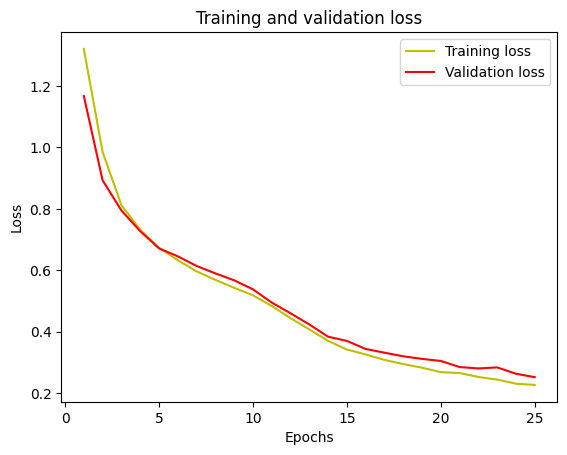

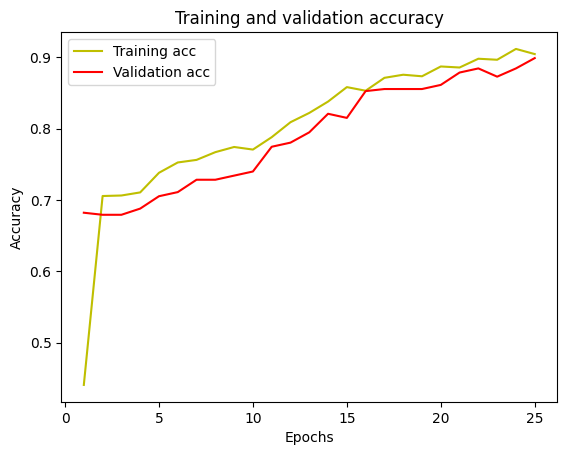

In [29]:
# 1. 데이터 전처리 (X: 특성, y: 타겟)
X = df.drop('class', axis=1)
y = df["class"]

# 2. One-hot Encoding
X = X.values
Y = pd.get_dummies(y).values

# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("data SHAPE :")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


import tensorflow as tf
from tensorflow import keras

# 4. Defining the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(32,input_shape=(6,),activation='relu'))  # 입력층 및 첫 번째 은닉층 (출력 뉴런 64개)
model.add(Dense(16,activation='relu'))  # 두 번째 은닉층 (출력 뉴런 32개)
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='softmax'))  # 출력층 (출력 뉴런 10개, 이진 분류 → sigmoid /다중 분류 → softmax)
model.compile(Adam(learning_rate=0.001),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

# 5. Fitting
model_history=model.fit(x=X_train, y=y_train, epochs=25, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# 6. Training and validation Loss/ Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
